In [1]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import cv2
import mediapipe as mp
import torch

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")
torch.cuda.empty_cache()

Using cuda device


In [3]:
# custom point
POSE_CONNECTIONS_CUSTOM = [
    # (3,0), (3,1), (3,15), (3,14), (3,17), (3,16), (3,2)
    (3,0), (3,1), (3,15), (3,14), (3,17), (3,16), (3,2)
]

def getLandmark(rgb_img,detection_result, centroidKanan, centroidKiri, koorHelper):
  # print(koorHelper)
  # print(centroidKanan)
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_img)

  # Loop through the detected poses to visualize.
  # for idx in range(len(pose_landmarks_list)):
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]
    # print("panjang pose landmarks",len(pose_landmarks))

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    koorCentroidKanan = landmark_pb2.NormalizedLandmark(x=centroidKanan[0], y=centroidKanan[1], z=centroidKanan[2])
    koorCentroidKiri = landmark_pb2.NormalizedLandmark(x=centroidKiri[0], y=centroidKiri[1], z=centroidKiri[2])
    koorHelper = landmark_pb2.NormalizedLandmark(x=koorHelper[0], y=koorHelper[1], z=koorHelper[2])
    pose_landmarks_proto.landmark.extend([koorCentroidKanan, koorCentroidKiri, koorHelper])
    n = 0
    for landmark in pose_landmarks:
      # if(n==0 or n==20 or n==22 or n==18 or n==16 or n==21 or n==19 or n==15 or n==17):
        pose_landmarks_proto.landmark.extend(
          [landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z)]
         )
        n = n+1

  return pose_landmarks_proto


def draw_landmarks_on_image(rgb_img, pose_landmarks_proto):

  annotated_image = np.copy(rgb_img)
  solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      POSE_CONNECTIONS_CUSTOM,
      # solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style()
      )


  return annotated_image

In [4]:
def getLandmarkMeters(rgb_img,detection_result, centroidKanan, centroidKiri, koorHelper):
  print(koorHelper)
  print(centroidKanan)
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_img)

  # Loop through the detected poses to visualize.
  # for idx in range(len(pose_landmarks_list)):
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]
    # print("panjang pose landmarks",len(pose_landmarks))

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.LandmarkList()
    koorCentroidKanan = landmark_pb2.Landmark(x=centroidKanan[0], y=centroidKanan[1], z=centroidKanan[2])
    koorCentroidKiri = landmark_pb2.Landmark(x=centroidKiri[0], y=centroidKiri[1], z=centroidKiri[2])
    koorHelper = landmark_pb2.Landmark(x=koorHelper[0], y=koorHelper[1], z=koorHelper[2])
    pose_landmarks_proto.landmark.extend([koorCentroidKanan, koorCentroidKiri, koorHelper])
    n = 0
    for landmark in pose_landmarks:
      # if(n==0 or n==20 or n==22 or n==18 or n==16 or n==21 or n==19 or n==15 or n==17):
        pose_landmarks_proto.landmark.extend(
          [landmark_pb2.Landmark(x=landmark.x, y=landmark.y, z=landmark.z)]
         )
        n = n+1

  return pose_landmarks_proto

In [5]:
# finding centroid

def findingCentroid(detection_result):
  kanan_1 = [detection_result.pose_landmarks[0][20].x, detection_result.pose_landmarks[0][20].y, detection_result.pose_landmarks[0][20].z]
  kanan_2 = [detection_result.pose_landmarks[0][22].x, detection_result.pose_landmarks[0][22].y, detection_result.pose_landmarks[0][22].z]
  kanan_3 = [detection_result.pose_landmarks[0][18].x, detection_result.pose_landmarks[0][18].y, detection_result.pose_landmarks[0][18].z]
  kanan_4 = [detection_result.pose_landmarks[0][16].x, detection_result.pose_landmarks[0][16].y, detection_result.pose_landmarks[0][16].z]
  avgKananY = (kanan_1[1] + kanan_2[1] + kanan_3[1] + kanan_4[1])/4
  avgKananX = (kanan_1[0] + kanan_2[0] + kanan_3[0] + kanan_4[0])/4
  avgKananZ = (kanan_1[2] + kanan_2[2] + kanan_3[2] + kanan_4[2])/4
  centroidKanan = [avgKananX, avgKananY, avgKananZ]

  kiri_1 = [detection_result.pose_landmarks[0][21].x, detection_result.pose_landmarks[0][21].y, detection_result.pose_landmarks[0][21].z]
  kiri_2 = [detection_result.pose_landmarks[0][19].x, detection_result.pose_landmarks[0][19].y, detection_result.pose_landmarks[0][19].z]
  kiri_3 = [detection_result.pose_landmarks[0][15].x, detection_result.pose_landmarks[0][15].y, detection_result.pose_landmarks[0][15].z]
  kiri_4 = [detection_result.pose_landmarks[0][17].x, detection_result.pose_landmarks[0][17].y, detection_result.pose_landmarks[0][17].z]
  avgKiriY = (kiri_1[1] + kiri_2[1] + kiri_3[1] + kiri_4[1])/4
  avgKiriX = (kiri_1[0] + kiri_2[0] + kiri_3[0] + kiri_4[0])/4
  avgKiriZ = (kiri_1[2] + kiri_2[2] + kiri_3[2] + kiri_4[2])/4
  centroidKiri = [avgKiriX, avgKiriY, avgKiriZ]

  koorHelper = [detection_result.pose_landmarks[0][0].x, detection_result.pose_landmarks[0][12].y, detection_result.pose_landmarks[0][0].z]

  return centroidKanan, centroidKiri, koorHelper


In [6]:
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands
from matplotlib.pyplot import imshow




In [7]:
def getFiturLandmarkTriangle(img):
  error = None
  landmarkData = None
  base_options = python.BaseOptions(model_asset_path='pose_landmarker_heavy.task')
  options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
  detector = vision.PoseLandmarker.create_from_options(options)
  img = img
  try:
    detection_result = detector.detect(img)
    centroidKanan, centroidKiri, koorHelper = findingCentroid(detection_result)
    landmarkData = getLandmark(img, detection_result, centroidKanan, centroidKiri, koorHelper)
    gambar = draw_landmarks_on_image(img.numpy_view(), landmarkData)
    error = None
  except:
    error = 1
    landmarkData = 0

  # imshow(cv2.cvtColor(gambar, cv2.COLOR_RGB2BGR))
  return landmarkData, detection_result, error

def getFiturJarak(landmarkData):
  fiturJarak = []
  for i in POSE_CONNECTIONS_CUSTOM:
    fiturJarak.append(np.linalg.norm(
      np.array((landmarkData.landmark[i[0]].x, landmarkData.landmark[i[0]].y, landmarkData.landmark[i[0]].z))
      -
      np.array((landmarkData.landmark[i[1]].x, landmarkData.landmark[i[1]].y, landmarkData.landmark[i[1]].z))
      ))
  # gambar = draw_landmarks_on_image(img.numpy_view(), landmarkData)
  # imshow(cv2.cvtColor(gambar, cv2.COLOR_RGB2BGR))

  return fiturJarak

def getFiturSudut(landmarkData):
  import math
  print(landmarkData.landmark[0].x)
  # dotA = [(detection_result.pose_landmarks[0][0].x - detection_result.pose_landmarks[0][3].x), (detection_result.pose_landmarks[0][0].y - detection_result.pose_landmarks[0][3].y)]
  # dotB =  [(detection_result.pose_landmarks[0][2].x - detection_result.pose_landmarks[0][3].x), (detection_result.pose_landmarks[0][2].y - detection_result.pose_landmarks[0][3].y)]
  # hasil = np.dot(dotA, dotB)
  # print(hasil)
  # norA = np.linalg.norm(dotA)
  # norB = np.linalg.norm(dotB)
  # sudut = math.degrees(math.acos(hasil/(norA*norB)))
  # print(sudut)

  n=0
  for i in POSE_CONNECTIONS_CUSTOM:
    if(n<len(POSE_CONNECTIONS_CUSTOM)):
      dotA = [(landmarkData.landmark[i[1]].x - landmarkData.landmark[3].x), (landmarkData.landmark[i[1]].y - landmarkData.landmark[3].y)]
      dotB =  [(landmarkData.landmark[2].x - landmarkData.landmark[3].x), (landmarkData.landmark[2].y - landmarkData.landmark[3].y)]
      norA = np.linalg.norm(dotA)
      norB = np.linalg.norm(dotB)
      hasil = np.dot(dotA, dotB)
      sudut = math.degrees(math.acos(hasil/(norA*norB)))
      print(sudut)
      n = n+1



#  ekstrak bentuk tangan
def mediapipeimg(image):
  with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
    results = hands.process(image)
    print('Handedness:', results.multi_handedness)



    image_height, image_width, _ = image.shape
    annotated_image = image.copy()

    landmark_tangan=[]
    for hand_landmarks in results.multi_hand_landmarks:
      # print('hand_landmarks:', hand_landmarks)
      # # landmark_tangan.append(hand_landmarks)
      # print(
      #     f'Index finger tip coordinates: (',
      #     f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
      #     f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      # )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())



    return results, annotated_image



In [8]:
def concateFitur(landmarkData):
  fiturJarakConcate = []
  errr = None
  if(len(landmarkData.landmark) != 0):
    for i in POSE_CONNECTIONS_CUSTOM:
      x = landmarkData.landmark[i[1]].x
      y = landmarkData.landmark[i[1]].y
      z = landmarkData.landmark[i[1]].z
      fiturJarakConcate.append(x)
      fiturJarakConcate.append(y)
      fiturJarakConcate.append(z)
    errr = None
    return fiturJarakConcate, errr
  else:
    errr = 1
    return fiturJarakConcate, errr
    


  # return fiturJarak

In [9]:
import pandas as pd

dtcb = []


for i in range (0,5):
    cbdtc = {
        'class': i,
        'fitur1': [1,2,3,4,5],
        'fitur2': [5,4,3,2,1],
    }
    dtcb.append(cbdtc)
    
dtcb_df = pd.DataFrame(dtcb)
print(dtcb_df)


   class           fitur1           fitur2
0      0  [1, 2, 3, 4, 5]  [5, 4, 3, 2, 1]
1      1  [1, 2, 3, 4, 5]  [5, 4, 3, 2, 1]
2      2  [1, 2, 3, 4, 5]  [5, 4, 3, 2, 1]
3      3  [1, 2, 3, 4, 5]  [5, 4, 3, 2, 1]
4      4  [1, 2, 3, 4, 5]  [5, 4, 3, 2, 1]


In [10]:
import os
import pandas as pd
from scipy.fft import fft, ifft


def load_feature_from_folder(folder):
  img = []
  data = []
  for folderName in os.listdir(folder):
    print(folderName)
    folder1 = os.path.join(folder, folderName)
    for foll in os.listdir(folder1):
      print(foll)
      folder2 = os.path.join(folder1, foll)
      cnt = 0
      for fileInside in os.listdir(folder2):
        pathLengkap = os.path.join(folder2, fileInside)
        namaClass = folderName
        mp_image = mp.Image.create_from_file(pathLengkap)
        fiturLandmark, detection_landmark, errFitur = getFiturLandmarkTriangle(mp_image)
        
        if(errFitur == None):
          hasil1, errConcate = concateFitur(fiturLandmark)
          hasilfft = fft(hasil1)
          masuk_data = {
            'class': namaClass,
            'namaFile': foll,
            'urutan': cnt,
            'triangle_feature': hasil1,
            'fourier_feature': hasilfft
          }
          cnt = cnt + 1
          data.append(masuk_data)
          # print(data)
        else:
          continue
  dataFrame = pd.DataFrame(data)
  dataFrame.to_csv("dataaaaa_with_class.csv", sep='\t')
         

# load_feature_from_folder("extractFrame")

In [11]:
def convert_to_fourier(x):
    res = fft(x)
    return res

In [12]:
from ast import literal_eval
df = pd.read_csv("dataaaaa_with_class.csv", delimiter="\t", converters={'triangle_feature': literal_eval})
data_triangle = df.iloc[:,4]
data_triangle_series = data_triangle.apply(pd.Series)



df["data_fourier"] = data_triangle.apply(convert_to_fourier)
data_fourier = df["data_fourier"]
data_fourier_series = data_fourier.apply(pd.Series)
data_fourier_series = data_fourier_series.astype(float)
data_fourier_series
# data_triangle_series


c:\Users\intel\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1181: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,4.399667,-0.502991,-0.299552,-0.035458,-0.020502,0.967879,0.602141,3.019354,0.040302,-0.942078,...,0.090829,-0.942078,0.040302,3.019354,0.602141,0.967879,-0.020502,-0.035458,-0.299552,-0.502991
1,3.961377,-0.584868,-0.327768,-0.036564,-0.007981,1.012021,0.636858,3.243325,0.060257,-0.942683,...,0.122846,-0.942683,0.060257,3.243325,0.636858,1.012021,-0.007981,-0.036564,-0.327768,-0.584868
2,5.251013,-0.647183,-0.481397,-0.046687,0.131729,0.998365,0.404392,2.615290,0.377851,-0.741087,...,0.103729,-0.741087,0.377851,2.615290,0.404392,0.998365,0.131729,-0.046687,-0.481397,-0.647183
3,3.923648,-0.902669,-0.351080,0.011847,0.086410,1.049736,0.619684,3.282290,0.428749,-0.980720,...,0.027080,-0.980720,0.428749,3.282290,0.619684,1.049736,0.086410,0.011847,-0.351080,-0.902669
4,4.016361,-0.952660,-0.389076,-0.005414,0.102455,1.068121,0.653060,3.238660,0.462505,-0.992919,...,-0.005342,-0.992919,0.462505,3.238660,0.653060,1.068121,0.102455,-0.005414,-0.389076,-0.952660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38725,4.428200,-0.809422,-1.249345,-1.012502,0.563003,1.893126,0.890043,3.360316,0.220279,-1.029865,...,-0.053300,-1.029865,0.220279,3.360316,0.890043,1.893126,0.563003,-1.012502,-1.249345,-0.809422
38726,4.439939,-0.823164,-1.287354,-1.055443,0.606351,1.935612,0.885240,3.347750,0.232719,-1.032643,...,-0.074234,-1.032643,0.232719,3.347750,0.885240,1.935612,0.606351,-1.055443,-1.287354,-0.823164
38727,4.423715,-0.823624,-1.238100,-1.034305,0.595268,1.908076,0.907058,3.366918,0.211738,-1.057392,...,-0.061025,-1.057392,0.211738,3.366918,0.907058,1.908076,0.595268,-1.034305,-1.238100,-0.823624
38728,4.254050,-0.804003,-1.191697,-0.973282,0.526522,1.845327,0.903038,3.462953,0.192223,-1.043835,...,-0.022975,-1.043835,0.192223,3.462953,0.903038,1.845327,0.526522,-0.973282,-1.191697,-0.804003


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
triangle_features_scaled = scaler.fit_transform(data_triangle_series)
fourirer_features_scaled = scaler.fit_transform(data_fourier_series)

In [14]:
# # k-means train

# from sklearn.cluster import KMeans

# sse_triangle = []
# sse_fourier = []
# for i in range(1,100):
#     kmeans_triangle = KMeans(n_clusters=i, random_state=i)
#     kmeans_fourier = KMeans(n_clusters=i, random_state=i)
#     kmeans_triangle.fit(triangle_features_scaled)
#     kmeans_fourier.fit(fourirer_features_scaled)
#     sse_triangle.append(kmeans_triangle.inertia_)
#     sse_fourier.append(kmeans_fourier.inertia_)


In [15]:
# from matplotlib import pyplot as plt
# plt.plot(range(1, 100), sse_triangle)
# plt.xticks(range(1, 100))
# plt.xlabel("Number of Clusters")
# plt.ylabel("SSE")
# plt.show()

In [16]:
# from matplotlib import pyplot as plt
# plt.plot(range(1, 100), sse_fourier)
# plt.xticks(range(1, 100))
# plt.xlabel("Number of Clusters")
# plt.ylabel("SSE")
# plt.show()

In [17]:
from sklearn.cluster import KMeans


kmeans_triangle = KMeans(n_clusters=10, random_state=20)
kmeans_triangle.fit(data_triangle_series)
kmeans_fourier = KMeans(n_clusters=10, random_state=20)
kmeans_fourier.fit(data_fourier_series)

KMeans(n_clusters=10, random_state=20)

<AxesSubplot:>

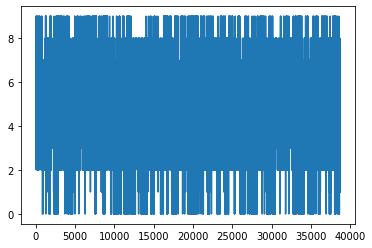

In [18]:
def kmeans_triangle_Predict(x):
    res = kmeans_triangle.predict(x)
    return res

def kmeans_fourier_Predict(x):
    res = kmeans_fourier.predict(x)
    return res


df['kmeans_triangle'] = kmeans_triangle_Predict(data_triangle_series)
df['kmeans_fourier'] = kmeans_fourier_Predict(data_fourier_series)

df['kmeans_fourier'].plot()


<AxesSubplot:>

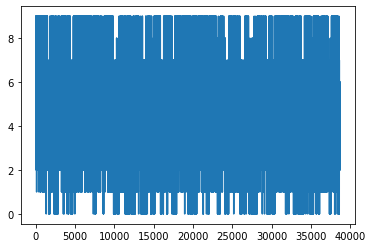

In [19]:
df['kmeans_triangle'].plot()

<AxesSubplot:>

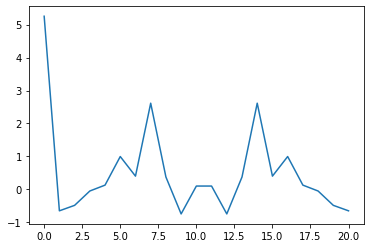

In [20]:
data_fourier_series.iloc[2].plot()

In [21]:
df

,Unnamed: 0,class,namaFile,urutan,triangle_feature,fourier_feature,data_fourier,kmeans_triangle,kmeans_fourier
0,0,above,430,0,"[0.48759597539901733, 0.8038008213043213, -0.7...",[ 4.39966673-0.j -0.50299108+0.7496396...,"[(4.399666726589203-0j), (-0.5029910830359349+...",9,6
1,1,above,430,1,"[0.49106013774871826, 0.7973707914352417, -0.8...",[ 3.96137702-0.j -0.58486803+0.7773593...,"[(3.9613770246505737-0j), (-0.5848680323296831...",9,6
2,2,above,430,2,"[0.5086197853088379, 0.6743682026863098, -0.66...",[ 5.25101289-0.00000000e+00j -0.64718317+7.710...,"[(5.251012891530991-0j), (-0.6471831678984575+...",3,4
3,3,above,430,3,"[0.49839532375335693, 0.6522558331489563, -0.9...",[ 3.92364752-0.j -0.90266913+0.9711652...,"[(3.9236475229263306-0j), (-0.9026691292545949...",9,6
4,4,above,430,4,"[0.49405437707901, 0.6206329464912415, -0.9722...",[ 4.01636094-0.j -0.95265955+1.0099958...,"[(4.016360938549042-0j), (-0.9526595542170583+...",9,6
...,...,...,...,...,...,...,...,...,...
38725,38725,yourself,64451,24,"[0.4748985767364502, 0.6089178323745728, -1.26...",[ 4.42819954-0.j -0.80942232+0.2826163...,"[(4.428199544548988-0j), (-0.8094223235548388+...",6,1
38726,38726,yourself,64451,25,"[0.47188615798950195, 0.6074104309082031, -1.2...",[ 4.43993916-0.j -0.82316441+0.2737199...,"[(4.43993915617466-0j), (-0.8231644097109412+0...",6,1
38727,38727,yourself,64451,26,"[0.4749017655849457, 0.6068911552429199, -1.27...",[ 4.42371461-0.j -0.82362443+0.2917456...,"[(4.423714607954025-0j), (-0.8236244264860786+...",6,1
38728,38728,yourself,64451,27,"[0.4782188832759857, 0.607271671295166, -1.267...",[ 4.2540502 -0.j -0.80400293+0.2951303...,"[(4.254050195217133-0j), (-0.8040029261455282+...",6,1


In [22]:
# create new database triangle

def buatDatasetLLM(dataset):
    classAwal = df["class"][0]
    fileAwal = df["namaFile"][0]
    stack = []
    datasetLLM = []
    for i in range(0,len(dataset)):
        classSekarang = dataset["class"][i]
        fileSekarang = dataset['namaFile'][i]
        if(classAwal == classSekarang):
            if(fileAwal == fileSekarang):
                stack.append(dataset['kmeans_triangle'][i])
            else:
                kelas = {
                'class': classSekarang,
                'file': fileSekarang,
                'feature': stack,
                }
                datasetLLM.append(kelas)
                fileAwal = fileSekarang
                stack = []
        else:
            kelas = {
                'class': classSekarang,
                'file': fileSekarang,
                'feature': stack,
                }
            datasetLLM.append(kelas)
            classAwal = classSekarang
            stack = []
            
            
            
            
    return datasetLLM
        
            

dts_triangle = buatDatasetLLM(df)
dts_triangle = pd.DataFrame(dts_triangle)
dts_triangle

,class,file,feature
0,above,431,"[9, 9, 3, 9, 9, 9, 9, 9, 9, 9, 3, 3, 9, 8, 3, ..."
1,above,433,"[2, 5, 5, 2, 2, 5, 5, 5, 5, 2, 2, 5, 5, 2, 5, ..."
2,above,435,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
3,above,65004,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ..."
4,accomplish,663,"[2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 2, 3, 3, 3, ..."
...,...,...,...
643,yourself,64445,[]
644,yourself,64446,"[6, 6, 6, 6, 0, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, ..."
645,yourself,64447,"[7, 3, 6, 0, 3, 0, 3, 3, 3, 3, 0, 7, 3, 3, 0, ..."
646,yourself,64448,"[7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, ..."


In [23]:
# create new database fourier

def buatDatasetLLM(dataset):
    classAwal = df["class"][0]
    fileAwal = df["namaFile"][0]
    stack = []
    datasetLLM = []
    for i in range(0,len(dataset)):
        classSekarang = dataset["class"][i]
        fileSekarang = dataset['namaFile'][i]
        if(classAwal == classSekarang):
            if(fileAwal == fileSekarang):
                stack.append(dataset['kmeans_fourier'][i])
            else:
                kelas = {
                'class': classSekarang,
                'file': fileSekarang,
                'feature': stack,
                }
                datasetLLM.append(kelas)
                fileAwal = fileSekarang
                stack = []
        else:
            kelas = {
                'class': classSekarang,
                'file': fileSekarang,
                'feature': stack,
                }
            datasetLLM.append(kelas)
            classAwal = classSekarang
            stack = []
            
            
            
            
    return datasetLLM
        
            

dts_fourier = buatDatasetLLM(df)
dts_fourier = pd.DataFrame(dts_fourier)
dts_fourier

,class,file,feature
0,above,431,"[6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, ..."
1,above,433,"[7, 7, 6, 4, 2, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, ..."
2,above,435,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ..."
3,above,65004,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, ..."
4,accomplish,663,"[7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 4, 4, ..."
...,...,...,...
643,yourself,64445,[]
644,yourself,64446,"[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 7, 1, 1, 1, 1, ..."
645,yourself,64447,"[2, 7, 7, 0, 4, 7, 4, 7, 7, 7, 0, 2, 7, 4, 0, ..."
646,yourself,64448,"[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ..."


In [24]:
dts_fourier.iloc[1]

class                                                  above
file                                                     433
feature    [7, 7, 6, 4, 2, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, ...
Name: 1, dtype: object

In [30]:
import torch
src = torch.rand((10, 32, 512))
tgt = torch.rand((20, 32, 512))
print(tgt.shape)
print(src.shape)

torch.Size([20, 32, 512])
torch.Size([10, 32, 512])
